In [1]:
# 利用Python撰寫程式來推演馬可夫決策過程
# 根據初始天氣狀態，預測之後某一天的天氣機率(晴天或下雨)

# 匯入numpy套件，用來做矩陣運算
import numpy as np

# 初始天氣狀態：2024/05/21(週二)為晴天
# 狀態向量pi代表今天的天氣分布[晴天的機率, 下雨的機率]
pi = np.array([[1, 0]])  # 因為今天是晴天，晴天機率為1，下雨機率為0

# 天氣轉移矩陣A(transition matrix)
# 表示今天的天氣轉移到明天的各種可能性
#      S    R
# S [[0.8, 0.2],  # 今天晴天(S)，明天晴天的機率為0.8，明天下雨的機率為0.2
# R  [0.1, 0.9]]  # 今天下雨(R)，明天晴天的機率為0.1，明天下雨的機率為0.9

A = np.array([[0.8, 0.2],
              [0.1, 0.9]])

# 計算明天2024/05/22(週三)的天氣機率分布
# 使用np.dot進行矩陣相乘：今天的狀態 * 轉移矩陣 = 明天的狀態分布
tomorrow = np.dot(pi, A)

# 輸出明天的天氣機率(tomorrow[0][0]為晴天機率，tomorrow[0][1]為下雨機率)
print('2024/05/22', tomorrow, 'Sunny', tomorrow[0][0], 'Rainy', tomorrow[0][1])

# 計算後天2024/05/23(週四)的天氣機率分布
# 使用昨天的結果(tomorrow)再次與轉移矩陣相乘，得到後天的狀態
next2days = np.dot(tomorrow, A)

# 輸出後天的天氣機率
print('2024/05/23', next2days, 'Sunny', next2days[0][0], 'Rainy', next2days[0][1])

2024/05/22 [[0.8 0.2]] Sunny 0.8 Rainy 0.2
2024/05/23 [[0.66 0.34]] Sunny 0.6600000000000001 Rainy 0.34


In [2]:
# 如果2024/05/21(週二)是晴天，請問10天後，2024/05/31(週五)出太陽的機率是多少？
# 使用馬可夫鏈進行逐日迭代模擬

total = 10     # 需要預測的天數(從今天往後推10天)
day = 1        # 初始為第1天(從今天的「下一天」開始推算)
weathers = []  # 用來記錄每一天的天氣機率分布(晴天、雨天)
current = pi   # 初始狀態：pi = [1, 0]，代表2024/05/21是晴天

# 進行10次迭代，每次代表一天
while day <= total:
    print(day)  # 印出目前是第幾天(從今天的「明天」開始)
    
    # 根據今天的天氣機率分布與轉移矩陣A，計算明天的機率分布
    next_weather = np.dot(current, A)
    
    # 將這一天的天氣機率分布加入weathers紀錄清單
    weathers.append(next_weather)
    
    # 更新current狀態，作為下一次迴圈的「今天」
    current = next_weather
    
    # 累加天數
    day = day + 1

# 印出第十天(2024/05/31)的天氣機率分布
# weathers[-1]表示第10次迭代的結果，也就是第10天的天氣狀態
print(weathers[-1])

1
2
3
4
5
6
7
8
9
10
[[0.35216502 0.64783498]]


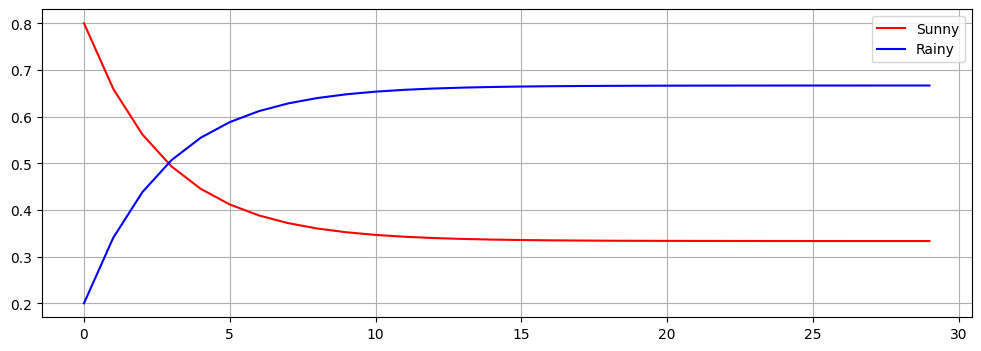

In [3]:
# 匯入matplotlib套件，用來繪製圖表
import matplotlib.pyplot as plt

# 匯入numpy套件，用來做矩陣運算
import numpy as np

# 初始狀態設定：今天是晴天，代表晴天機率是1、下雨機率是0
pi = np.array([[1, 0]])  # [Sunny, Rainy]

# 天氣轉移矩陣A
# 表示今天晴/雨，明天晴/雨的機率
#         明天S  明天R
# 今天S [[ 0.8 ,  0.2 ],
# 今天R  [ 0.1 ,  0.9 ]]

A = np.array([[0.8, 0.2],
              [0.1, 0.9]])

# 模擬30天的天氣機率
total = 30
day = 1
weathers = []  # 儲存每天的[晴天機率, 雨天機率]
current = pi   # 初始天氣(今天)

# 逐日迭代推算
while day <= total:
    next_weather = np.dot(current, A)  # 根據今天天氣機率分布，計算明天的分布
    weathers.append(next_weather)      # 把明天的機率存入列表
    current = next_weather             # 將明天的狀態設定為下一輪的今天
    day += 1                           # 增加天數

# 將weathers(列表)轉成numpy陣列並調整為shape(30, 2)
# 每列為一天：[晴天機率, 雨天機率]
data = np.array(weathers).reshape(-1, 2)

# 畫出機率變化折線圖
plt.figure(figsize = (12, 4))       # 設定圖的大小(寬12英吋，高4英吋)
plt.plot(data[:, 0], color='red')   # 畫出晴天機率曲線(第1欄)，紅色
plt.plot(data[:, 1], color='blue')  # 畫出下雨機率曲線(第2欄)，藍色
plt.grid()                          # 顯示格線
plt.legend(['Sunny', 'Rainy'])      # 加上圖例說明曲線代表晴天和雨天
plt.show()                          # 顯示圖表

[[0.8        0.2       ]
 [0.66       0.34      ]
 [0.562      0.438     ]
 [0.4934     0.5066    ]
 [0.44538    0.55462   ]
 [0.411766   0.588234  ]
 [0.3882362  0.6117638 ]
 [0.37176534 0.62823466]
 [0.36023574 0.63976426]
 [0.35216502 0.64783498]]


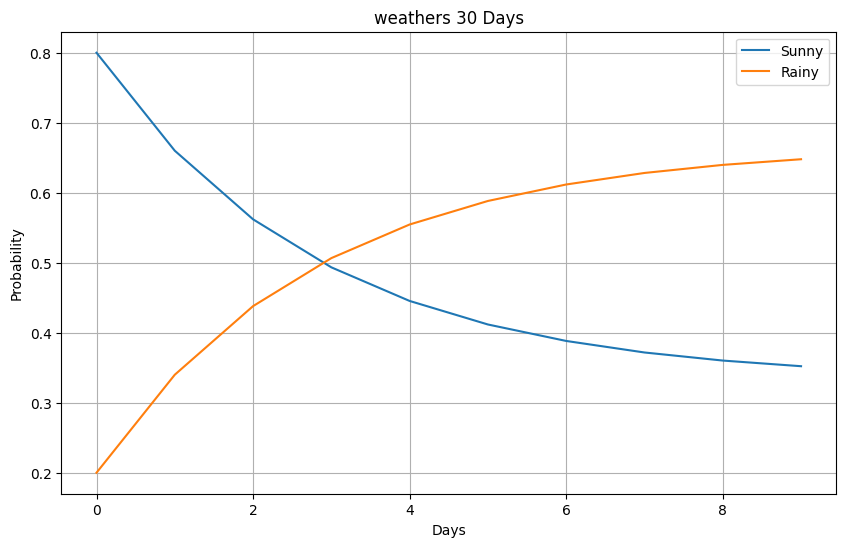

In [4]:
# 匯入matplotlib套件，用來繪製圖表
import matplotlib.pyplot as plt

# 匯入numpy套件，用來做矩陣運算
import numpy as np

# 初始天氣狀態：今天是晴天(Sunny = 1, Rainy = 0)
pi = np.array([[1, 0]])

# 天氣轉移矩陣
#     S     R
# S  0.8   0.2
# R  0.1   0.9

A = np.array([[0.8, 0.2],
              [0.1, 0.9]])

weathers = []

# 將pi迭代10次，每次都將結果扁平化後加進列表
for _ in range(10):
    pi = np.dot(pi, A)
    weathers.append(pi.flatten())

# 將結果轉成numpy array(10 x 2)
weathers = np.array(weathers)
print(weathers)

# 畫出機率變化折線圖
plt.figure(figsize = (10, 6))   # 設定圖的大小(寬10英吋，高6英吋)
plt.plot(weathers[:, 0])        # 畫出晴天機率曲線(第1欄)
plt.plot(weathers[:, 1])        # 畫出下雨機率曲線(第2欄)
plt.title(f"weathers 30 Days")  # 設定圖表標題
plt.xlabel("Days")              # 加上X軸標籤(天數)
plt.ylabel("Probability")       # 加上Y軸標籤(機率)
plt.legend(["Sunny", "Rainy"])  # 加上圖例說明曲線代表晴天和雨天
plt.grid()                      # 顯示格線
plt.show()                      # 顯示圖表